# Problem Statement
Create a regression model to predict flight fares using features like departure and arrival locations, flight duration, airline, and travel date. The aim is to accurately estimate flight prices, helping travelers with their planning and airlines with their pricing strategies.

# Data Preparetion:
data = https://docs.google.com/spreadsheets/d/1BBA4uUf6b4gd8JaJdlFRXvzxZtb4djWj/edit?usp=drive_link&ouid=114815927267366108906&rtpof=true&sd=true

In [3]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [5]:
from google.colab import drive
drive.mount('/content/mount/')

Drive already mounted at /content/mount/; to attempt to forcibly remount, call drive.mount("/content/mount/", force_remount=True).


In [11]:
# Load Data
train_data = pd.read_excel(r"/content/mount/MyDrive/csv_files/ML PR REG1/fligh_fare_train_data.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
# shape of train_data
train_data.shape

(10683, 11)

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Observation: There are potential outliers in the "Price" column, especially at the higher end, as indicated by the max value, which is significantly higher than the Interquartile Range.

Skewness:1.8126


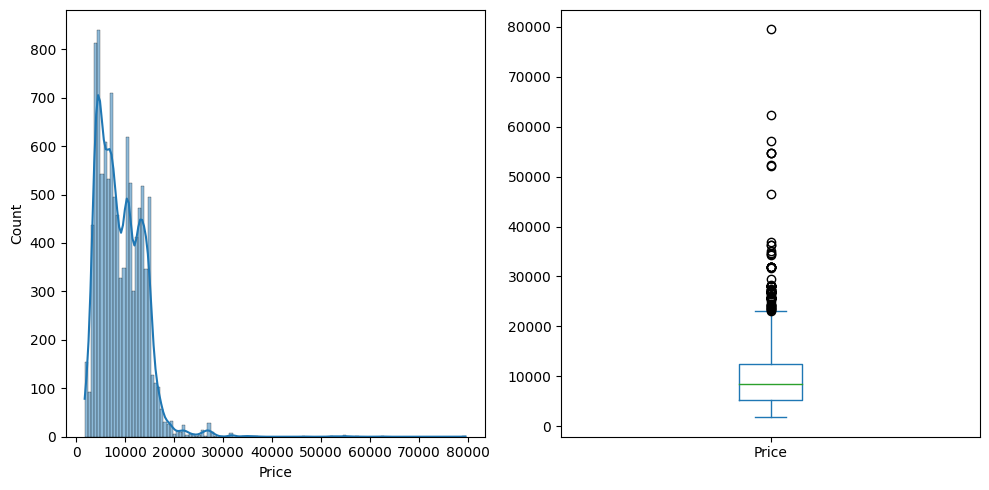

In [18]:
# check the Distribution of "Price" Columns
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(train_data['Price'],kde = True)
print(f"Skewness:{train_data['Price'].skew():.4f}")

plt.subplot(1,2,2)
train_data["Price"].plot(kind = "box")

plt.tight_layout()

Observation:
The "Price" column distribution is positively skewed with skewness of 1.8126 , indicting longer tail on the hihger end.

In [13]:
# Apply log transformation to reduce the

In [19]:
# Outlier detect and remove by z-score method
mean = train_data["Price"].mean()
std = train_data["Price"].std()
treshold = 3
train_data["Z-score"] = np.abs((train_data["Price"]-mean)/std)
outlier = train_data[train_data["Z-score"]>treshold]
print(f"There are {len(outlier)} outlier in the 'Price' column")
print(f"Index of Outlier are {outlier.index}")

There are 96 outlier in the 'Price' column
Index of Outlier are Index([  123,   396,   486,   510,   597,   628,   657,   785,   826,   936,
         946,   959,   975,  1196,  1246,  1341,  1424,  1466,  1478,  1629,
        1654,  1785,  1918,  2055,  2099,  2108,  2495,  2556,  2618,  2635,
        2693,  2924,  3032,  3111,  3257,  3400,  3535,  3700,  4012,  4521,
        4676,  4829,  5013,  5136,  5372,  5439,  5662,  5701,  5710,  5719,
        5738,  5745,  5856,  5986,  6314,  6407,  6576,  6588,  6605,  6991,
        7351,  7356,  7377,  7537,  7554,  7617,  7713,  7724,  7756,  7902,
        8020,  8080,  8451,  8470,  8536,  8598,  8856,  8940,  8957,  8990,
        9019,  9193,  9239,  9632,  9715,  9974, 10052, 10113, 10160, 10182,
       10189, 10353, 10364, 10383, 10439, 10511],
      dtype='int64')


In [20]:
 # drop the Outlier from train_data
 train_data = train_data.drop(outlier.index)

In [21]:
train_data.shape

(10587, 12)

# Handling missing Value

In [23]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Z-score            0
dtype: int64

In [24]:
# There is only one null value we remove .
train_data = train_data.dropna()

In [26]:
# check Duplicate Value
train_data.duplicated().sum()

220

In [27]:
# There are 220 duplicated value lets remove and keep first value
train_data = train_data.drop_duplicates(keep="first")

In [28]:
train_data.duplicated().sum()

0

In [29]:
# DONE!

# Feature Engineering

In [30]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Z-score
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,1.125496
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,0.309033
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1.039810
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,0.622173
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,0.914033


In [31]:
# let's split the "Date_of_Journey".
train_data["Date_of_Journey"] = pd.to_datetime(train_data["Date_of_Journey"])
train_data["Day"] = train_data["Date_of_Journey"].dt.day
train_data["Month"] = train_data["Date_of_Journey"].dt.month
train_data["Year"] = train_data["Date_of_Journey"].dt.year
train_data["Day_of_week"] = train_data["Date_of_Journey"].dt.day_name()

<ipython-input-31-f75fa239a668>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data["Date_of_Journey"] = pd.to_datetime(train_data["Date_of_Journey"])


In [34]:
# let's split "Dep_Time" into "Dep_Hour" and "Dep_Min"
train_data["Dep_Houe"] = train_data["Dep_Time"].str.split(":").str[0].astype("int64")
train_data["Dep_Min"] = train_data["Dep_Time"].str.split(":").str[1].astype("int64")

In [38]:
# lets split "Arrival_Time" into "Arrival_Hour" and "Arrival_Min"
train_data['Arrival_Hour'] = train_data['Arrival_Time'].str.split(':').str[0].astype('int64')
train_data['Arrival_Minute'] = train_data['Arrival_Time'].str.split(':').str[1].str.split(' ').str[0].astype('int64')

In [39]:
# let's "Duration" convert  to min column
train_data['Duration'].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '23h 10m', '18h 10m', '16h', '2h 20m', '8h',
       '16h 55m', '3h 10

Observation:
In "Duration" column there are only "m" suffix value this (stands for) is not possible so search and delete.

In [43]:
train_data["Duration_h"] = train_data["Duration"].str.split(" ").str[0].str.replace("h","")
train_data[train_data["Duration_h"].str.contains("m")]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Z-score,Day,Month,Year,Day_of_week,Dep_Houe,Dep_Min,Arrival_Hour,Arrival_Minute,Duration_h
6474,Air India,2019-03-06,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2 stops,No info,...,1.786878,6,3,2019,Wednesday,16,50,16,55,5m


In [45]:
train_data = train_data.drop([6474],axis = 0)

In [60]:
train_data["Duration_h"] = train_data["Duration_h"].astype("int64")

In [61]:
train_data["Duration_m"] = train_data["Duration"].str.split(" ").str[1]
print(f"Null Value in 'Duration_m' column {train_data['Duration_m'].isnull().sum()}")
print("replace with '0' value")
train_data["Duration_m"] = train_data["Duration_m"].fillna("0")
train_data["Duration_m"] = train_data["Duration_m"].str.replace("m","").astype("int64")
train_data.head(3)

Null Value in 'Duration_m' column 1001
replace with '0' value


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Day,Month,Year,Day_of_week,Dep_Houe,Dep_Min,Arrival_Hour,Arrival_Minute,Duration_h,Duration_m
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,...,24,3,2019,Sunday,22,20,1,10,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,1,5,2019,Wednesday,5,50,13,15,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,9,6,2019,Sunday,9,25,4,25,19,0


In [62]:
train_data["Duration"] = train_data["Duration_h"]*60 + train_data["Duration_m"]

In [68]:
# divide Route Column
train_data["Route1"] = train_data["Route"].str.split("→").str[0].fillna('None')
train_data["Route2"] = train_data["Route"].str.split("→").str[1].fillna('None')
train_data["Route3"] = train_data["Route"].str.split("→").str[2].fillna('None')
train_data["Route4"] = train_data["Route"].str.split("→").str[3].fillna('None')
train_data["Route5"] = train_data["Route"].str.split("→").str[4].fillna('None')

In [70]:
train_data[['Total_Stops', 'Route']]

,Total_Stops,Route
0,non-stop,BLR → DEL
1,2 stops,CCU → IXR → BBI → BLR
2,2 stops,DEL → LKO → BOM → COK
3,1 stop,CCU → NAG → BLR
4,1 stop,BLR → NAG → DEL
...,...,...
10678,non-stop,CCU → BLR
10679,non-stop,CCU → BLR
10680,non-stop,BLR → DEL
10681,non-stop,BLR → DEL


In [71]:
# by simple visualization we can can see there is realtion that in route column if remove source and destination then its remaning stops should be total_stops
train_data["Total_Stops"] = train_data["Route"].apply(lambda x:len(x.split(" → "))-2)

In [72]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Dep_Min,Arrival_Hour,Arrival_Minute,Duration_h,Duration_m,Route1,Route2,Route3,Route4,Route5
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No info,...,20,1,10,2,50,BLR,DEL,None,None,None
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No info,...,50,13,15,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No info,...,25,4,25,19,0,DEL,LKO,BOM,COK,None


In [74]:
# drop old and irrleveant column
train_data = train_data.drop(["Date_of_Journey","Route","Dep_Time","Arrival_Time","Additional_Info","Z-score","Duration_h","Duration_m"],axis=1)

In [75]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10365 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline         10365 non-null  object
 1   Source          10365 non-null  object
 2   Destination     10365 non-null  object
 3   Duration        10365 non-null  int64 
 4   Total_Stops     10365 non-null  int64 
 5   Price           10365 non-null  int64 
 6   Day             10365 non-null  int32 
 7   Month           10365 non-null  int32 
 8   Year            10365 non-null  int32 
 9   Day_of_week     10365 non-null  object
 10  Dep_Houe        10365 non-null  int64 
 11  Dep_Min         10365 non-null  int64 
 12  Arrival_Hour    10365 non-null  int64 
 13  Arrival_Minute  10365 non-null  int64 
 14  Route1          10365 non-null  object
 15  Route2          10365 non-null  object
 16  Route3          10365 non-null  object
 17  Route4          10365 non-null  object
 18  Route5     